# **Introduction to Statistics in Python**

**references:**

**[1]** Online course: Data Scientist in Python (DataCamp)

**[2]** Bruce, P., Bruce, A., Gedeck P.(2020). Practical Statistics for Data Scientists (2nd ed.). O’Reilly Media, United States of America.

## **Types of statistics**

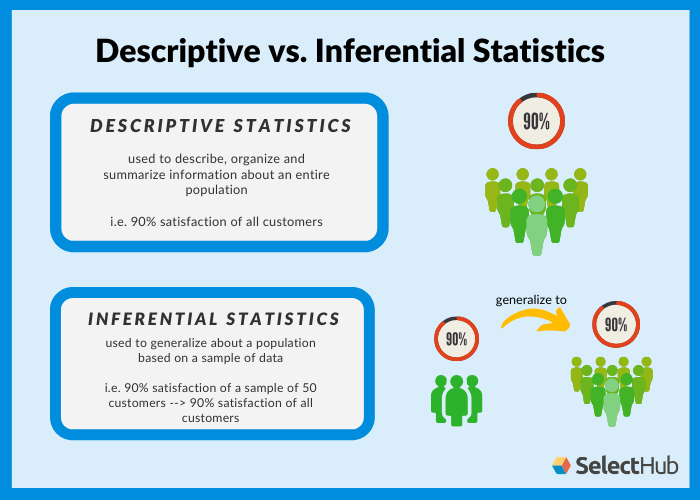

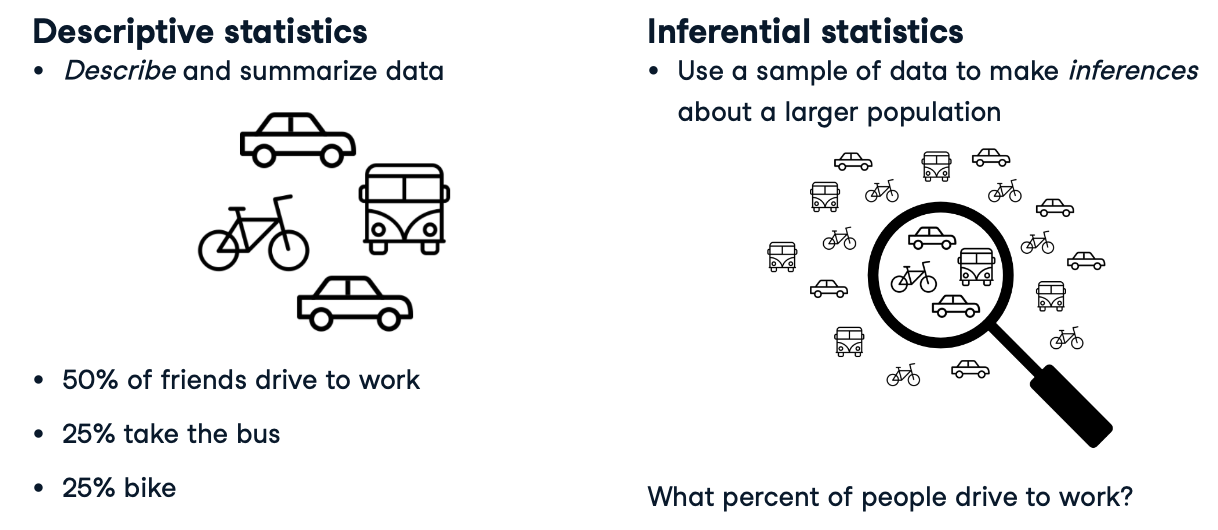

### **Descriptive statistics**
used for describing and summarizing the data at hand

**ex**
- Given data on every customer service request made, what's the average time it took to respond
- Given data on all 100,000 people who viewed an ad, what percent of people clicked on it

### **Inferential statistics**
 uses the data at hand, which is called sample data, to make inferences about a larger population

 **ex**
 - After interviewing 100 customers, what percent of all your customers are satisfied with your product ?
 - Given data on 20 fish caught in a lake, what 's the average weight of all fish in the lake ?

## **Types of data**

-  the data type is important to help determine the type of visual display, data analysis, or statistical model

- this matters to deicide which types of summary statistics and visualizations make sense for the data

-  data science software, such as R and Python, uses these data types to improve computational performance

- the data type for a variable determines how software will handle computations for that variable

- data typing in software acts as a signal to the software on how to process the data

### **Numeric (Quantitative)**
the data is made up of numeric values

- summary statistics like mean, and plots like scatter plots make sense for this type of data

- summary statistics like count, and plots like bar plots **don't** make sense for this type of data

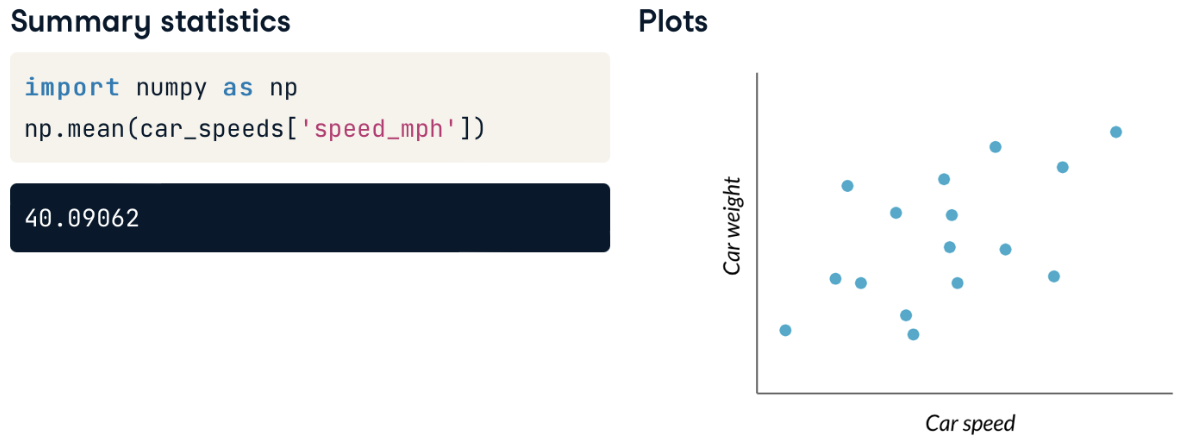

#### **Continuous (Measured)**
Data that can take on any value in an interval. (Synonyms: interval, float, numeric)


- Airplane speed
- Time spent waiting in line
- Air temperature
- Kilowatts of electricity

#### **Discrete (Counted)**

Data that can take on only integer values, such as counts. (Synonym: integer)

- Number of pets
- Number of packages shipped
- Number of clicks on an ad
- Number of DataCamp courses taken

### **Categorical (Qualitative)**
the data is made up of values that belong to distinct groups

- can sometimes represent as number
- summary statistics like count, and plots like bar plots make sense for this type of data
- scatter plot **don't** make a ton of sense for categorical data


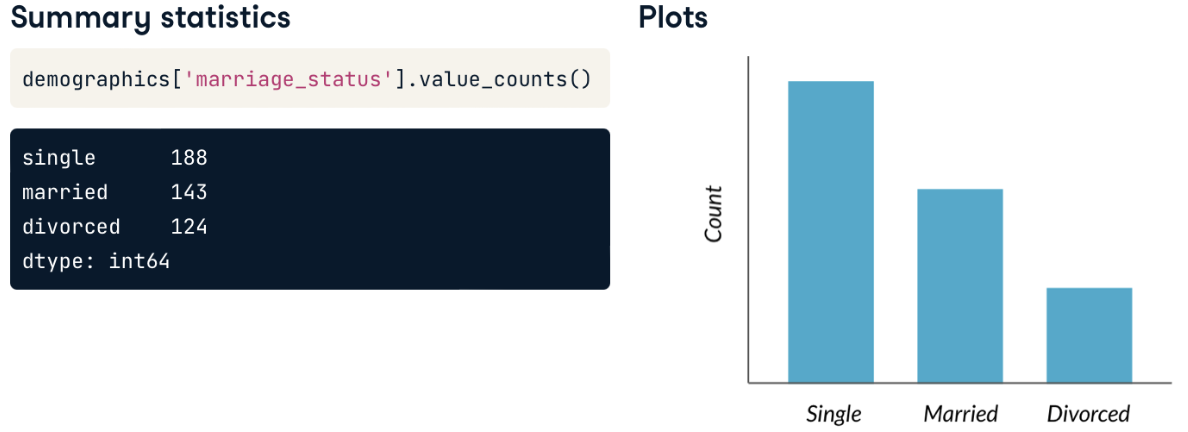

#### **Nominal (Unordered)**
Data that can take on only a specific set of values representing a set of possible categories with no inherent ordering (Synonyms: enums, enumerated, factors, nominal)

**ex :**
- Married/unmarried (1/0)
- Country of residence (1, 2, ...)
- Brand of product
- Zip code

#### **Ordinal (Ordered)**
categorical data has an inherent order

**ex**: degree indicating how much you agree with a statement in a survey question

- Strongly disagree (1)
- Somewhat disagree (2)
- Neither agree nor disagree (3)
- Somewhat agree (4)
- Strongly agree (5)


#### **Binary**
A special case of categorical data with just two categories of values,

**ex:**
- 0/1, true/false

(Synonyms: dichotomous, logical, indicator, boolean)


## **Measures of center**
an estimate of where most of the data is located (its central tendency)

### **Mean**
sum of all the data points divided by the total number of data points (**syn**: average)
- the mean is more sensitive to extreme values(outlier), but it works better for symmetrical data like this


### **Median**
the middle number on a sorted list of the data (**syn**: 50th percentile, 0.5 quantile)

- median is usually better to use with screwed data (not symmetrical)

### **The Screwed data**
- Left Screwed: when the data is piled up on the right with a tail on the left

- Right Screwed: when the data is piled up on the left with a tail on the right

💡the mean is pulled around by extream values (in the direction of the screw). So, when the data is skewed, the median is better to use since it is less affected by outliers

### **Example of computing Mean and Median**

>compute measures of center to compare food consumption in the US and Belgium using your pandas and numpy skills




In [1]:
#create food_consumption dataframe
import pandas as pd
url = 'https://raw.githubusercontent.com/RadchaneepornC/Python-Learning/main/Statistics%20in%20Python/dataset/food_consumption.csv'
df_food_consumption = pd.read_csv(url)
df_food_consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [2]:
#(I) subsetting and calling the same numpy function
import numpy as np
# Filter for Belgium
df_food_consumption_BG = df_food_consumption[df_food_consumption['country']=='Belgium']

# Filter for USA
df_food_consumption_USA = df_food_consumption[df_food_consumption['country']=='USA']

# Calculate mean and median consumption in Belgium
print(np.mean(df_food_consumption_BG["consumption"]))
print(np.median(df_food_consumption_BG["consumption"]))

# Calculate mean and median consumption in Belgium
print(np.mean(df_food_consumption_USA["consumption"]))
print(np.median(df_food_consumption_USA["consumption"]))

42.13272727272727
12.59
44.650000000000006
14.58


In [3]:
#(I) subsetting and using pandas methods

# Filter for Belgium
df_food_consumption_BG = df_food_consumption[df_food_consumption['country']=='Belgium']

# Filter for USA
df_food_consumption_USA = df_food_consumption[df_food_consumption['country']=='USA']

# Calculate mean and median consumption in Belgium
print(df_food_consumption_BG["consumption"].mean())
print(df_food_consumption_BG["consumption"].median())

# Calculate mean and median consumption in Belgium
print(df_food_consumption_USA["consumption"].mean())
print(df_food_consumption_USA["consumption"].median())

42.13272727272727
12.59
44.650000000000006
14.58


In [4]:
#(II) use .groupby() and .agg() [prefer method]
import numpy as np

# Subset for Belgium and USA only
be_and_usa = df_food_consumption[(df_food_consumption['country']=='Belgium')\
                                 | (df_food_consumption['country']=='USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean,np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


### **Mode**
most frequent value

## **Measures of spread**

(or Estimates of Variability)
measures whether the data values are tightly clustered or spread out

- At the heart of statistics lies variability: measuring it, reducing it, distinguishing random from real variability, identifying the various sources of real variability, and making decisions in the presence of it


### **Deviation**
The difference between the observed values and the estimate of location, this value tell us **how dispersed the data is around the central value**

**Synonyms**: errors, residuals

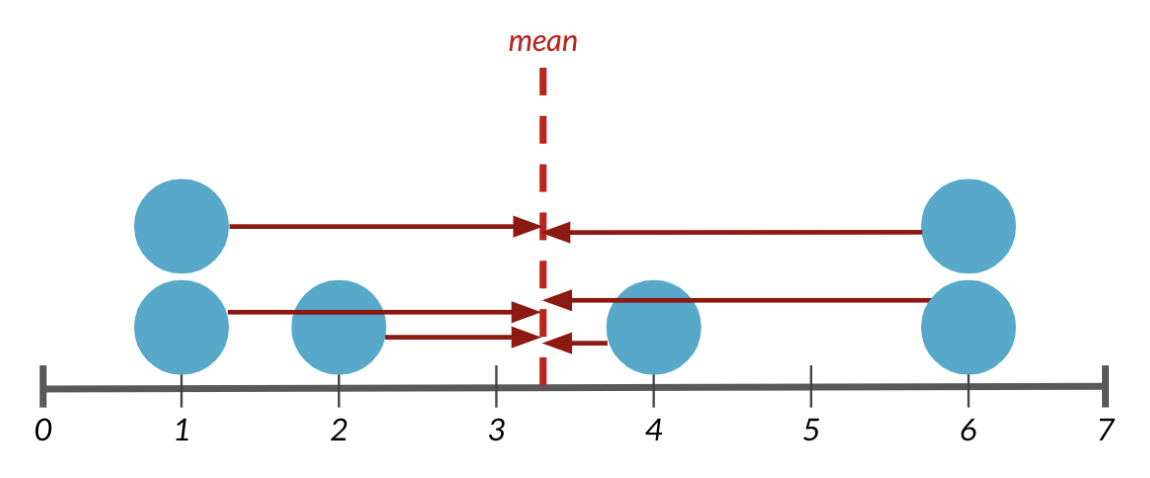

### **Variance (Mean Square Error: MSE)**
   


  > The variance is the average of the squared deviations from the mean, i.e.,

    var = mean(x)
where

    x = abs(a - a.mean())**2

Average distance from each data point to the data's mean

- The higher the variance, the more spread out the data is

#### **using pandas**

    DataFrame.var(axis=None, skipna=True, ddof=1, numeric_only=False, **kwargs)

- Return unbiased variance over requested axis.

- Normalized by N-1 by default (sample variance instead of population variance, N ). This can be changed using the ddof argument.


**Parameters:**

- **axis**

*{index (0), columns (1)}*

For Series this parameter is unused and defaults to 0

- **skipna**

*bool, default True*

Exclude NA/null values. If an entire row/column is NA, the result will be NA

- **ddof**

*int, default 1*

Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements

- **numeric_only**

*bool, default False*

Include only float, int, boolean columns. Not implemented for Series

**Returns**

Series or DataFrame (if level specified)




#### **using numpy**

    numpy.var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)

  ❗️default numpy ddof = 0, but pandas ddof = 1 ❗️


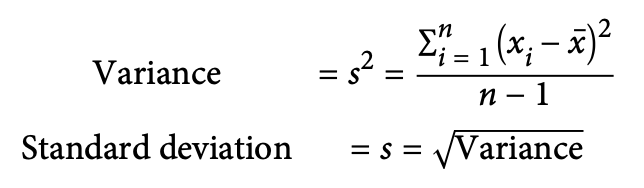

### **Standard deviation (SD)**

The standard deviation is the square root of the average of the squared deviations from the mean, i.e.,

    std = sqrt(mean(x))
where

    x = abs(a - a.mean())**2

❗️ SD is more common than MAD ❗️



#### **using pandas**

    DataFrame.std(axis=None, skipna=True, ddof=1, numeric_only=False, **kwargs)

Return sample standard deviation over requested axis

Normalized by N-1 by default. This can be changed using the ddof argument

**Parameters**
- **axis**

{index (0), columns (1)}

For Series this parameter is unused and defaults to 0

- **skipna**

*bool, default True*

Exclude NA/null values. If an entire row/column is NA, the result will be NA.

- **ddof**

int, default 1

Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements

- **numeric_only**

*bool, default False *

Include only float, int, boolean columns. Not implemented for Series.

**Returns**

Series or DataFrame (if level specified)
Notes


#### **using numpy**
To have the same behaviour as pandas std, **use ddof=0** (instead of the default ddof=1)

### **Mean absolute deviation (MAD)**

The mean of the absolute values of the deviations from the mean

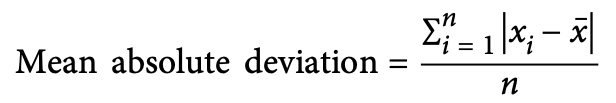

x̄ = sample mean

### **Quantiles (Percentiles)**

split up the data into some number of equal parts

#### **Quartiles**
25% of the data, split the dataset into 4 pieces

    np.quantile(dataframe_name, [0, 0.25, 0.5, 0.75, 1])

#### **Quintiles**

split the dataset into 5 pieces


    np.quantile(dataframe_name, [0, 0.2, 0.4, 0.6, 0.8, 1])

#### **Deciles**

split the dataset into 10 pieces

    np.quantile(dataframe_name, [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

### **Interquartile range (IQR)**

can calculated from both ways:

 - the distance between the 25th and 75th percentile (height of the box in a boxplot)

 - using iqr function from scipy.stats



### **Outliers**

data point that is substantially different from the others



#### **Criteria to filter outliners**

- data < Q1 - 1.5 x IQR
- data > Q3 + 1.5 x IQR

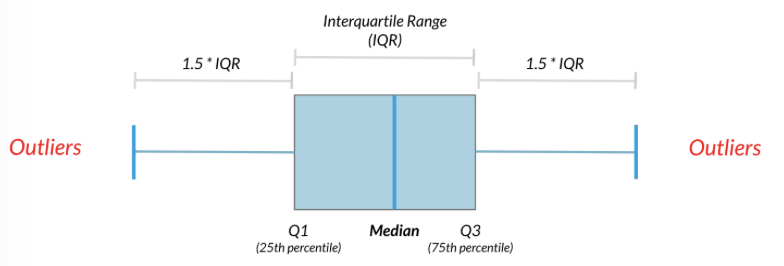

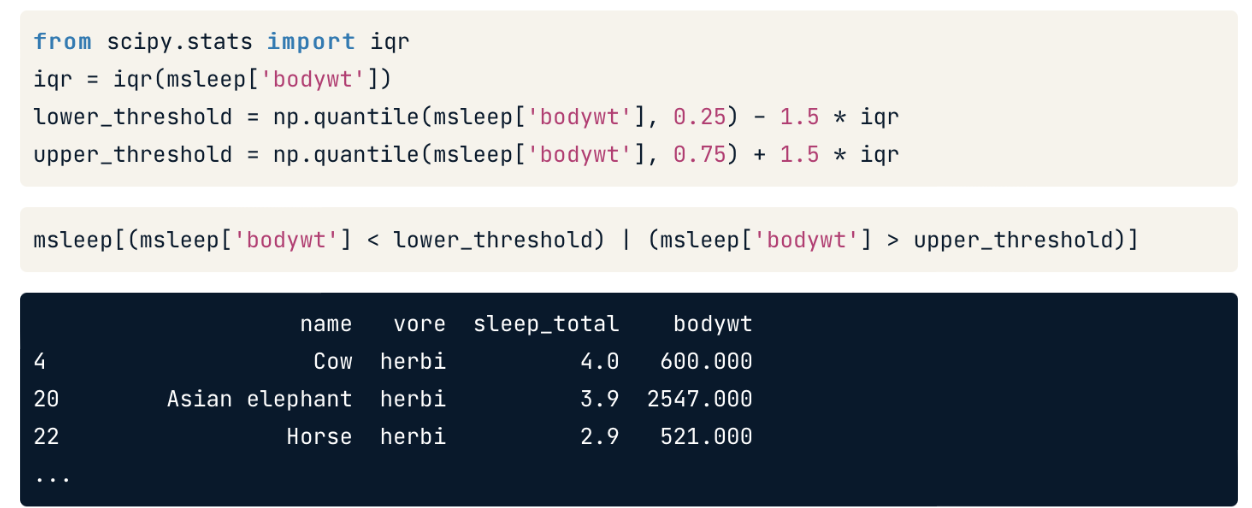

#### **Example of finding outliers using IQR**



In [5]:
import numpy as np

#(I) Calculate the total co2_emission per country by grouping by country
#and taking the sum of co2_emission.

# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = df_food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower)|(emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


# **Random number anf type of probability**

## **Sample**

### **sample with replacement**
each pick is independent

**ex**

*   Rolling a dice twice
*   Flipping a coin 3 times



### **sample without replacement**
each pick is dependent

**ex**

*   Randomly picking 3 people to work on the weekend from a group of 20 people
*   Randomly selecting 5 products from the assembly line to test quality assurance
*   From a desk of cards, dealing 3 players 7 cards each






## **Calculating probabilities**

P(event) = (# ways event can happen)/(total # of possible outcomes)

In [12]:
import numpy as np
import pandas as pd
url2='https://raw.githubusercontent.com/RadchaneepornC/Python-Learning/main/Statistics%20in%20Python/dataset/amir_deals.csv'
df_amir_deals = pd.read_csv(url2, index_col = 0)
df_amir_deals

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17
...,...,...,...,...,...
174,Product A,Current,Lost,5835.32,23
175,Product D,Current,Won,6377.50,12
176,Product D,Current,Won,3537.61,28
177,Product A,Current,Won,6448.07,34


what the chances are of selecting certain deals


*   Count the number of deals Amir worked on for each product type and store in counts
*   Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs




In [13]:
counts = df_amir_deals.value_counts("product")
counts

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
dtype: int64

In [14]:
probs = counts / df_amir_deals.shape[0]
probs
#If you randomly select one of Amir's deals,
#The probability that the deal will involve Product C = 8.43%

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
dtype: float64

 - randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received

 - need to set the random seed before sampling from the deals

In [22]:
# Sample 5 deals without replacement
np.random.seed(24)
sample_without_replacement = df_amir_deals.sample(5)
sample_without_replacement

,product,client,status,amount,num_users
128,Product B,Current,Won,2070.25,7
149,Product D,Current,Won,3485.48,52
78,Product B,Current,Won,6252.30,27
105,Product D,Current,Won,4110.98,39
167,Product C,New,Lost,3779.86,11


In [25]:
# Sample 5 deals with replacement
np.random.seed(24)
sample_with_replacement = df_amir_deals.sample(5, replace = True)
print(sample_with_replacement)

       product   client status   amount  num_users
163  Product D  Current    Won  6755.66         59
132  Product B  Current    Won  6872.29         25
88   Product C  Current    Won  3579.63          3
146  Product A  Current    Won  4682.94         63
146  Product A  Current    Won  4682.94         63


## **Discrete Distribution**

## **Continuous Distribution**